<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Statistical Modeling and Model Validation

---

## Objective
The goal of this assessment is to guide you through the modeling workflow to produce the best possible model. In this lesson, you will apply the best practices you've learned to date to slice your data and validate your model. 

You'll demonstrate the following skills:

**Linear Regression**
* Handling categorical features in a scikit-learn model.
* Carrying out a train/test split.
* Training a model.
* Evaluating that model on the testing data.

**K-Nearest Neighbors:**
* Preparing your data for modeling.
* Scaling your data.
* Tuning a hyperparameter using k-fold cross-validation.
* Selecting a model based on a tuning parameter.
* Using a model to make predictions on new data.

## Imports

In [307]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 

# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Modeling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

# Part 1: Regression on MPG Data

## Read the Data
The [`mpg` data set](https://archive.ics.uci.edu/ml/datasets/auto+mpg) represents the fuel economy (in miles per gallon) for 38 popular models of car, measured between 1999 and 2008.

|Factor      |Type                              |Description                                               |
|------------|----------------------------------|----------------------------------------------------------|
|manufacturer|multi-valued discrete             |Vehicle manufacturer                                      |
|model       |multi-valued discrete             |Model of the vehicle                                      |
|displ       |continuous                        |Size of engine [litres]                                   |
|year        |multi-valued discrete             |Year of vehicle manufacture                               |
|cyl         |multi-valued discrete             |Number of ignition cylinders                              |
|trans       |multi-valued discrete             |Transmission type (manual or automatic)                   |
|drv         |multi-valued discrete             |Driven wheels (f=front, 4=4-wheel, r=rear wheel drive)    |
|city        |continuous                        |Miles per gallon, city driving conditions (fuel economy)  |
|fl          |multi-valued discrete             |Vehicle type                                              |
|class       |multi-valued discrete             |Vehicle class (suv, compact, etc)                         |

In [182]:
# Read the mpg data in the data folder into this repository.
mpg = pd.read_csv('data/mpg.csv')

## Explore the Data
Use this space to familiarize yourself with the data set.

Convince yourself that there are no issues with the data. If you find any, clean them now.

In [7]:
#Quick check
print(mpg.index)
print(mpg.columns)
print(mpg.head(10))


RangeIndex(start=0, stop=234, step=1)
Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')
  manufacturer       model  displ  year  cyl       trans drv  cty  hwy fl  \
0         audi          a4    1.8  1999    4    auto(l5)   f   18   29  p   
1         audi          a4    1.8  1999    4  manual(m5)   f   21   29  p   
2         audi          a4    2.0  2008    4  manual(m6)   f   20   31  p   
3         audi          a4    2.0  2008    4    auto(av)   f   21   30  p   
4         audi          a4    2.8  1999    6    auto(l5)   f   16   26  p   
5         audi          a4    2.8  1999    6  manual(m5)   f   18   26  p   
6         audi          a4    3.1  2008    6    auto(av)   f   18   27  p   
7         audi  a4 quattro    1.8  1999    4  manual(m5)   4   18   26  p   
8         audi  a4 quattro    1.8  1999    4    auto(l5)   4   16   25  p   
9         audi  a4 quattro    2.0  2008    4  manual(m6)   4 

In [10]:
# Check for null values
mpg.isnull().sum()
mpg.isnull().any()

manufacturer    False
model           False
displ           False
year            False
cyl             False
trans           False
drv             False
cty             False
hwy             False
fl              False
class           False
dtype: bool

In [11]:
mpg.shape

(234, 11)

In [9]:
#Also be thorough with:

mpg.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [12]:
mpg.describe

<bound method NDFrame.describe of     manufacturer   model  displ  year  cyl       trans drv  cty  hwy fl  \
0           audi      a4    1.8  1999    4    auto(l5)   f   18   29  p   
1           audi      a4    1.8  1999    4  manual(m5)   f   21   29  p   
2           audi      a4    2.0  2008    4  manual(m6)   f   20   31  p   
3           audi      a4    2.0  2008    4    auto(av)   f   21   30  p   
4           audi      a4    2.8  1999    6    auto(l5)   f   16   26  p   
..           ...     ...    ...   ...  ...         ...  ..  ...  ... ..   
229   volkswagen  passat    2.0  2008    4    auto(s6)   f   19   28  p   
230   volkswagen  passat    2.0  2008    4  manual(m6)   f   21   29  p   
231   volkswagen  passat    2.8  1999    6    auto(l5)   f   16   26  p   
232   volkswagen  passat    2.8  1999    6  manual(m5)   f   18   26  p   
233   volkswagen  passat    3.6  2008    6    auto(s6)   f   17   26  p   

       class  
0    compact  
1    compact  
2    compact  
3    

## Dummify the `drv` Variable

In [17]:
drv_dummy = pd.get_dummies(mpg.drv)
mpg = pd.concat([mpg, drv_dummy], axis=1, sort=False)

In [19]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,4,f,r
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,0,1,0
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0,1,0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0,1,0
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0,1,0
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,0,1,0


## Split Your Data Into Factors (`X`) and Target (`y`)
You only need to keep the `displ` and `drv` variable(s) here, as those are the only columns you'll be fitting your model on in the next section.

In [37]:
# State the independent variables/factors
X = mpg[['4','f','r', 'displ']]

# State the dependent variables/outputs
y = mpg.hwy



## Instantiate a Linear Regression Model Object Predicting Highway MPG
Instantiate a `LinearRegression` object here.

In [38]:
# Import, instantiate, fit.
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)
# Pair the feature names with the coefficients.
list(zip(feature_cols, linreg.coef_))

34.1749246803946
[-3.34948756  1.44111054  1.90837702 -2.91408456]


[('4', -3.349487561898365),
 ('f', 1.4411105421723787),
 ('r', 1.9083770197259875)]

## Evaluate Your Model

- Run five-fold cross-validation on your data.
  - Report the mean of the mean squared error across five folds.
  - Report the mean R-squared value across five folds.

In [41]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

#cross folds
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=5432)
# Set X and Y
X = mpg[['4','f','r', 'displ']]
y = mpg['hwy']

#State what type of model
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

#outputs
print('Cross Validated MSE:', np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print('Cross Validated RMSE:', np.sqrt(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print('Cross Validated R-squared:', np.mean(cross_val_score(lr, X, y, cv=kf)))

Cross Validated MSE: 9.953254539389198
Cross Validated RMSE: 3.154877896114079
Cross Validated R-squared: 0.7145305667547259


# Part 2: Classification Using KNN

## Read in the `diamonds` Data
This is data regarding 50,000 round-cut diamonds.

|Factor            |Description                                                                                 |
|------------------|--------------------------------------------------------------------------------------------|
|price             |price in US dollars (326-18,823)                                                            |
|carat             |weight of the diamond (0.2--5.01)                                                           |
|cut               |quality of the cut (Fair, Good, Very Good, Premium, Ideal)                                  |
|color             |diamond colour, from J (worst) to D (best)                                                  |
|clarity           |how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))            |
|x                 |length in mm (0--10.74)                                                                     |
|y                 |width in mm (0--58.9)                                                                       |
|z                 |depth in mm (0--31.8)                                                                       |
|depth             |total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)                          |
|table             |width of top of diamond relative to widest point (43--95)                                   |

In [362]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import svm, preprocessing 
import seaborn as sns
dia = pd.read_csv('data/diamonds.csv')

## Explore the Data

In [363]:
#Quick check
print(dia.index)
print(dia.columns)
print(dia.head(10))

RangeIndex(start=0, stop=53940, step=1)
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')
   carat        cut color clarity  depth  table  price     x     y     z
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39


In [364]:
# Check for null values
dia.isnull().sum()
dia.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [365]:
#Also be thorough with:
dia.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

[]

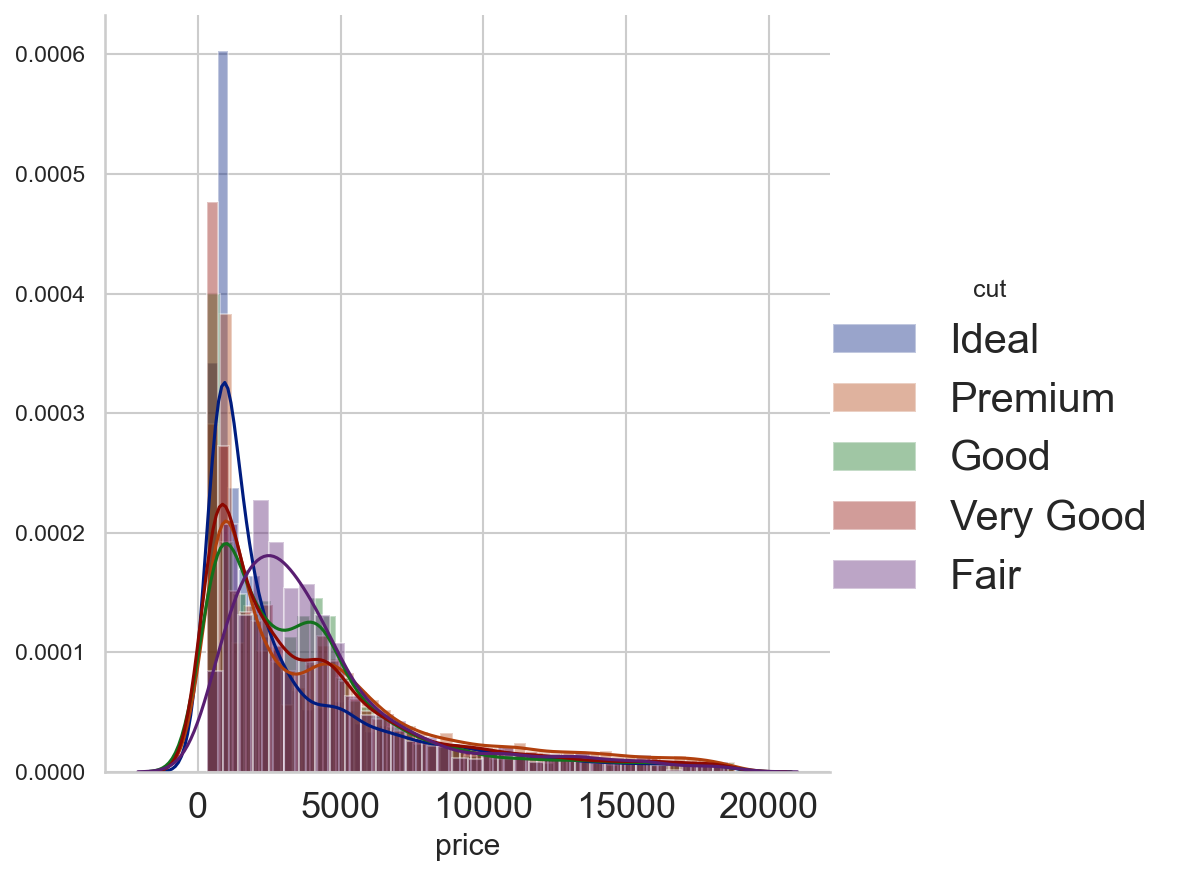

In [366]:
sns.FacetGrid(dia, hue = 'cut', height = 6).map(sns.distplot, 'price').add_legend()
plt.plot()

## Filter Your Data
Filter your data to only contain diamonds with `'Ideal'` and `'Good'` cuts.

In [367]:
dia.cut.value_counts()
#See distribution

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [368]:
#Drop rows with Premium, Very Good, and Fair to extract desired cut categories for the revised dia-dataframe
#Note Ideal more numerous than Good
dia=(dia.drop(dia[dia.cut.str.contains('Premium') | 
                 dia.cut.str.contains('Very Good') | 
                 dia.cut.str.contains('Fair')].index))



In [369]:

dia.cut.value_counts()

Ideal    21551
Good      4906
Name: cut, dtype: int64

## Downsample the Majority Class

In [370]:
#Find number of samples that are  minority (Good)
Good = len(dia[dia['cut'] == 'Good'])

In [371]:
#Get indices of majority (Ideal) sample
Ideal_indices = dia[dia.cut == 'Ideal'].index

In [372]:
#Random sample indices of majority (Ideal)
random_indices = np.random.choice(Ideal_indices, Good, replace=False)

In [373]:
#Find the indices of minority (Good) samples
Good_indices=dia[dia.cut == 'Good'].index

In [374]:
#Concat minority (Good) indices with sample non-fraud ones
under_sample_indices = np.concatenate([Good_indices,random_indices])

In [375]:
#Obtain balanced dataframe
under_sample = dia.loc[under_sample_indices]

<AxesSubplot:xlabel='cut', ylabel='count'>

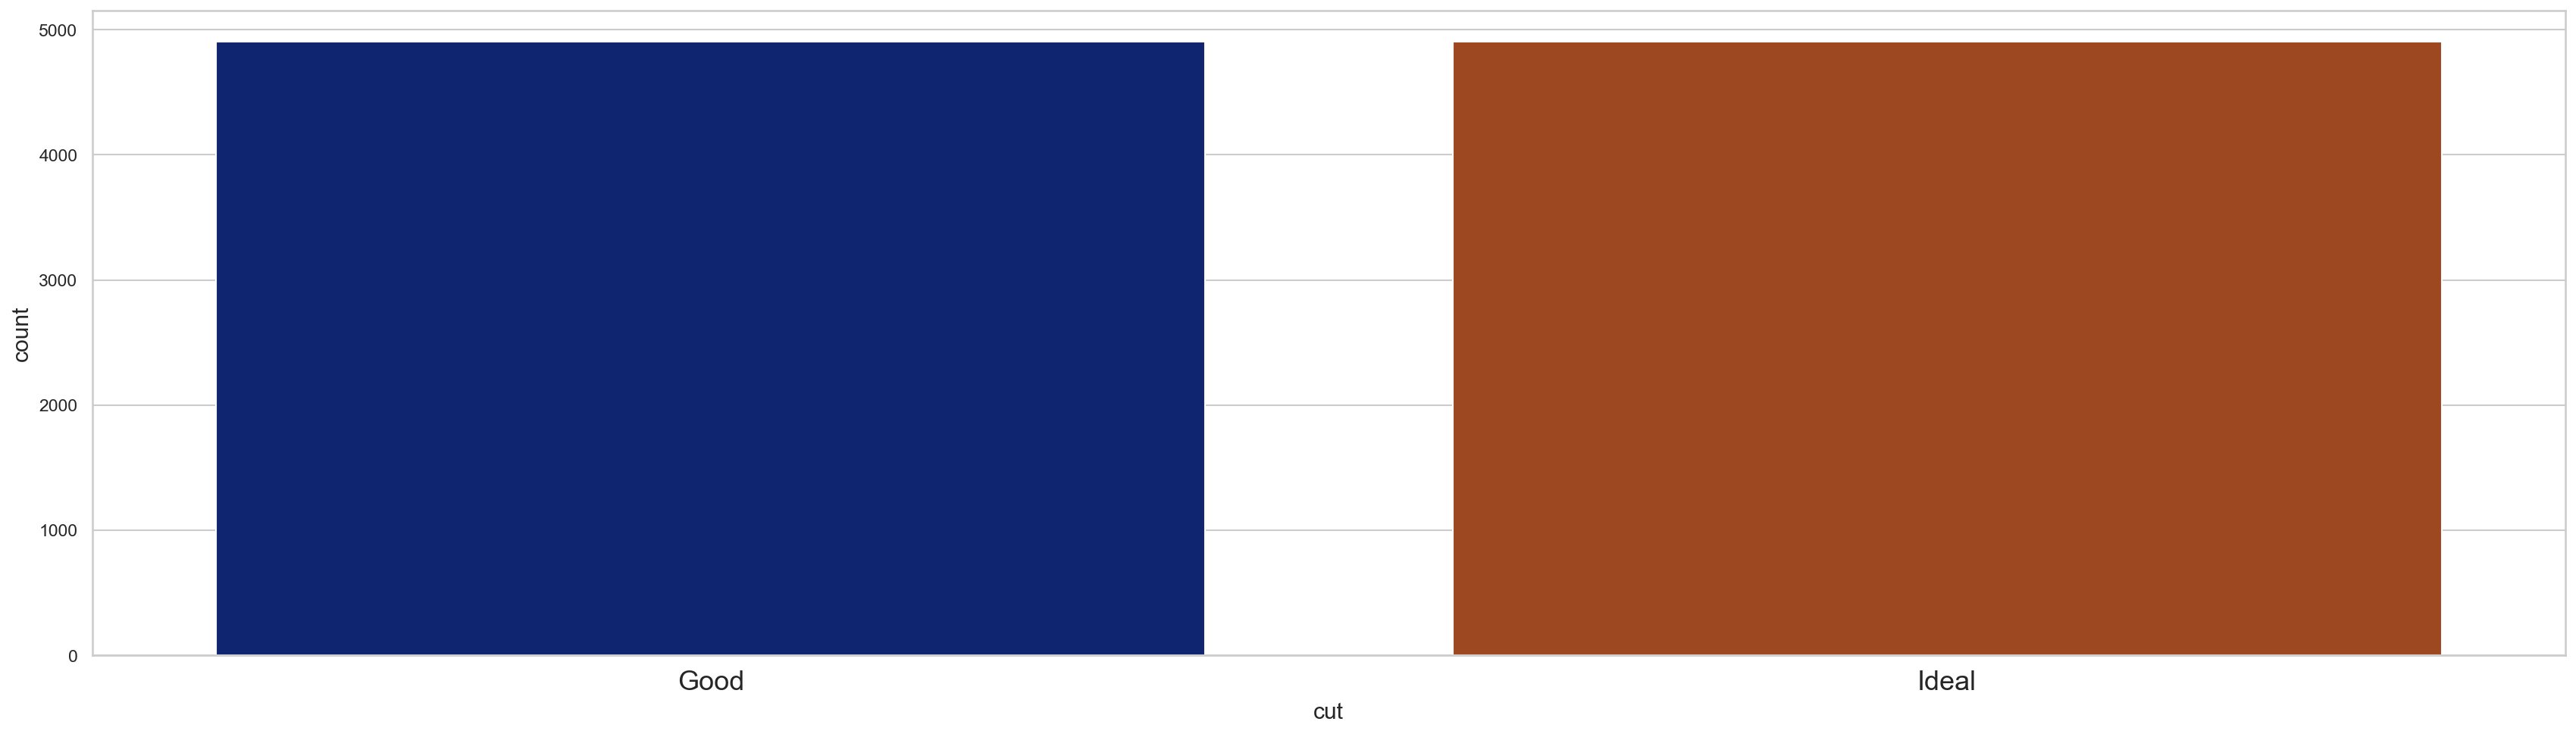

In [376]:
#Verify balance in dataframe under_sample
sns.countplot(x='cut', data=under_sample)

## Prepare Your `X`, `y` Matrices
Construct an `X` matrix using **all numeric columns** from the `diamonds` data.

You will be predicting `cut`. Construct a `y` vector in a numeric format that can be used by scikit-learn.

In [377]:
under_sample = sklearn.utils.shuffle(under_sample) 
# Shuffle/Randomize your data to avoid any biases that may happen.

X = under_sample.drop("price", axis=1).values
y = under_sample["price"].values

In [378]:
#Remove non-numerical columns (color, clarity) and so obtain only numerical columns
under_sample.drop(['color', 'clarity'], axis=1)


,carat,cut,depth,table,price,x,y,z
36604,0.34,Ideal,62.4,57.0,477,4.47,4.50,2.80
1915,0.71,Ideal,62.2,57.0,3081,5.74,5.70,3.56
25239,2.01,Good,63.1,55.0,13849,7.99,8.09,5.07
39987,0.41,Ideal,61.4,55.0,1107,4.83,4.78,2.95
3613,0.77,Good,64.3,56.0,3428,5.84,5.77,3.73
...,...,...,...,...,...,...,...,...
19746,1.50,Good,61.9,60.0,8316,7.25,7.28,4.50
6816,1.01,Good,63.7,55.0,4118,6.38,6.31,4.05
29064,0.40,Good,63.3,56.0,687,4.68,4.74,2.98
1304,0.76,Ideal,61.7,54.0,2954,5.88,5.92,3.64


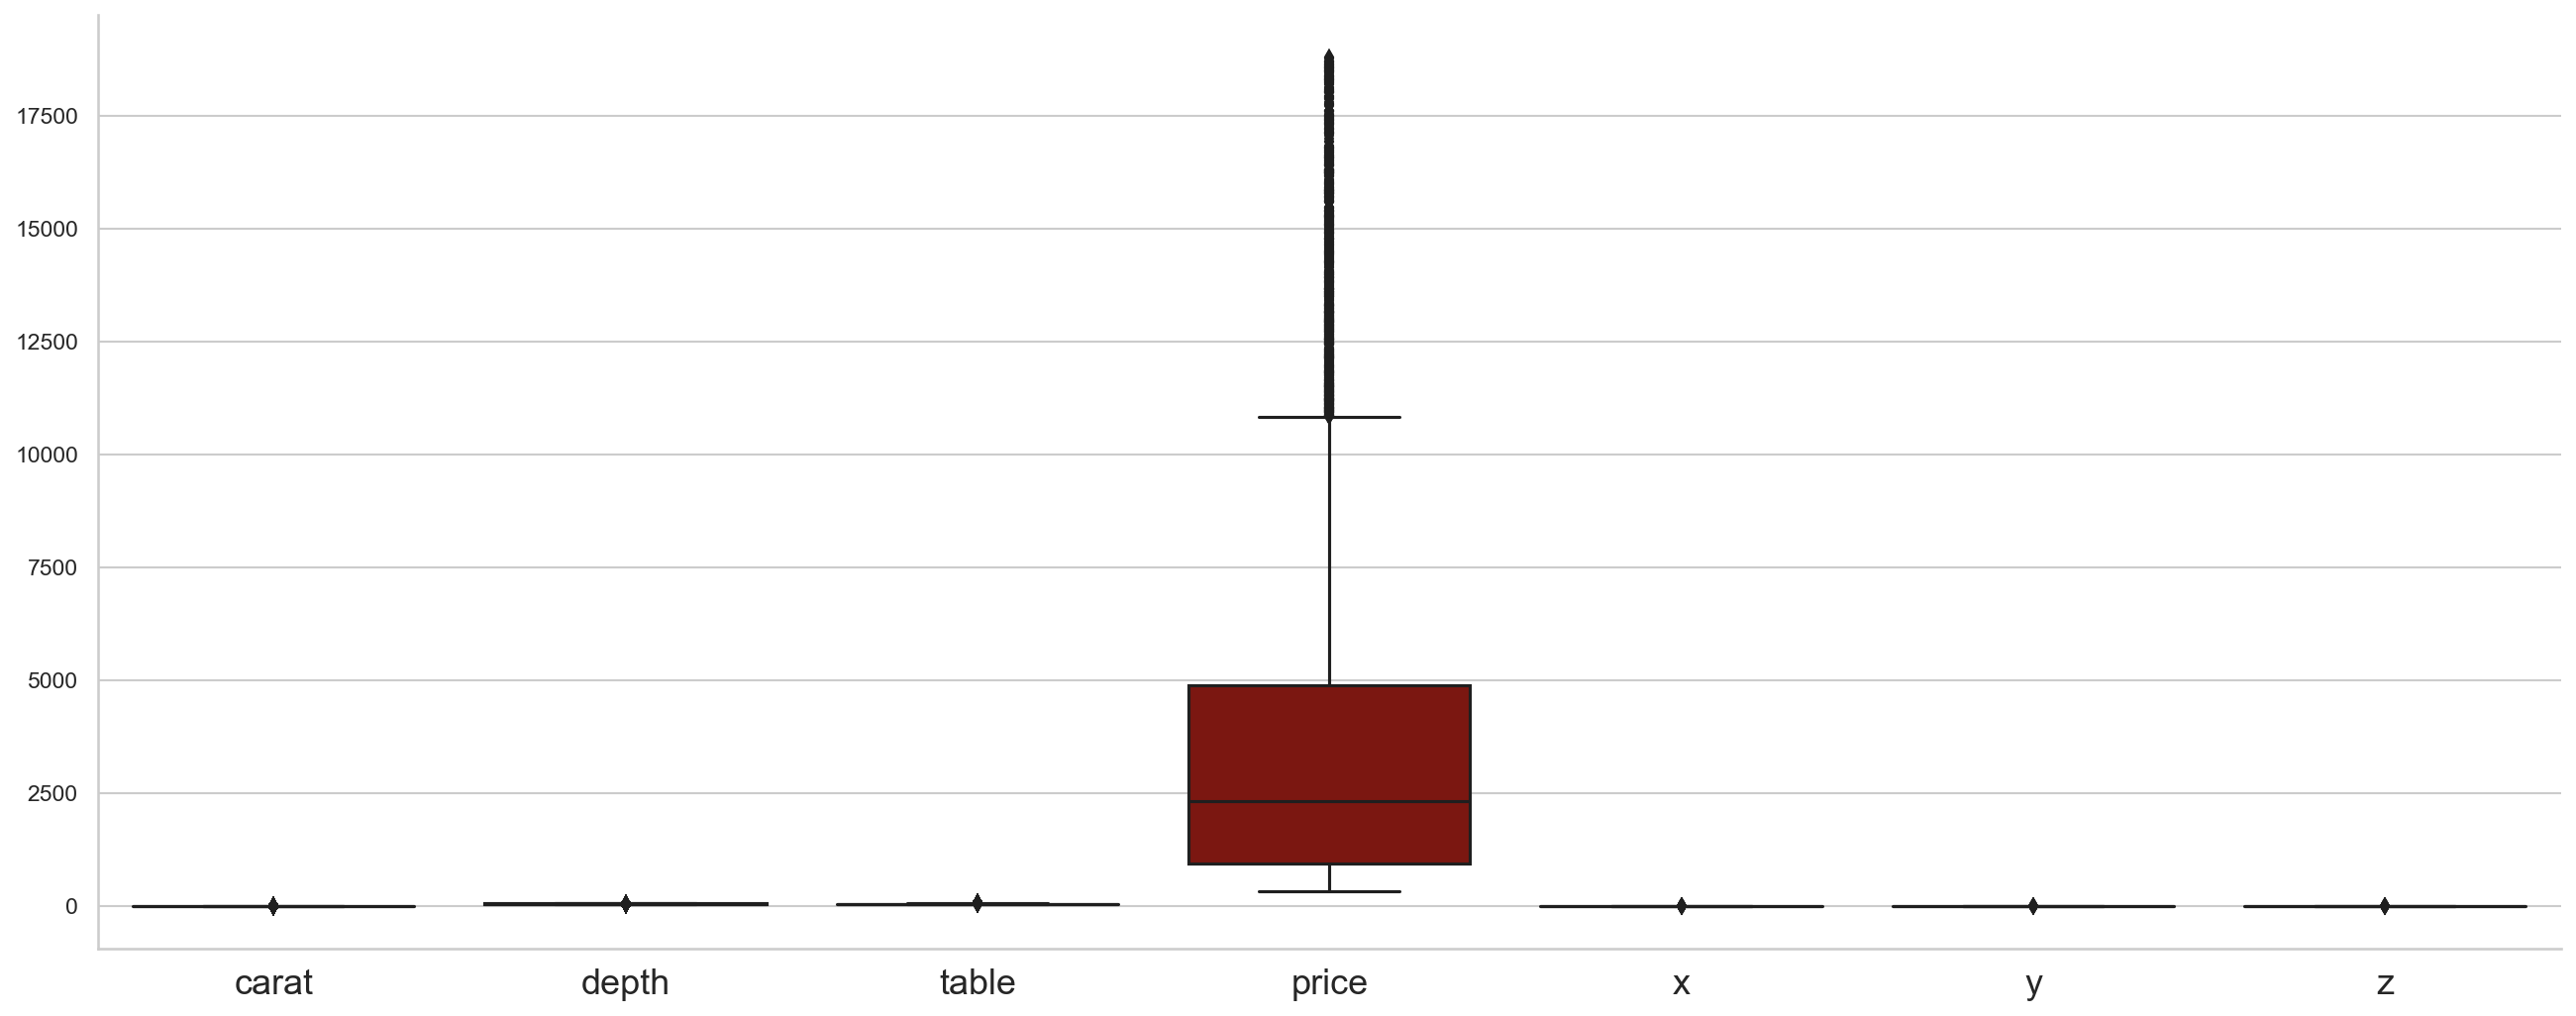

In [379]:
#Check on what scale needs to be adjusted
sns.factorplot(data=under_sample , kind='box' , size=7, aspect=2.5)
#It's 'price'

<AxesSubplot:>

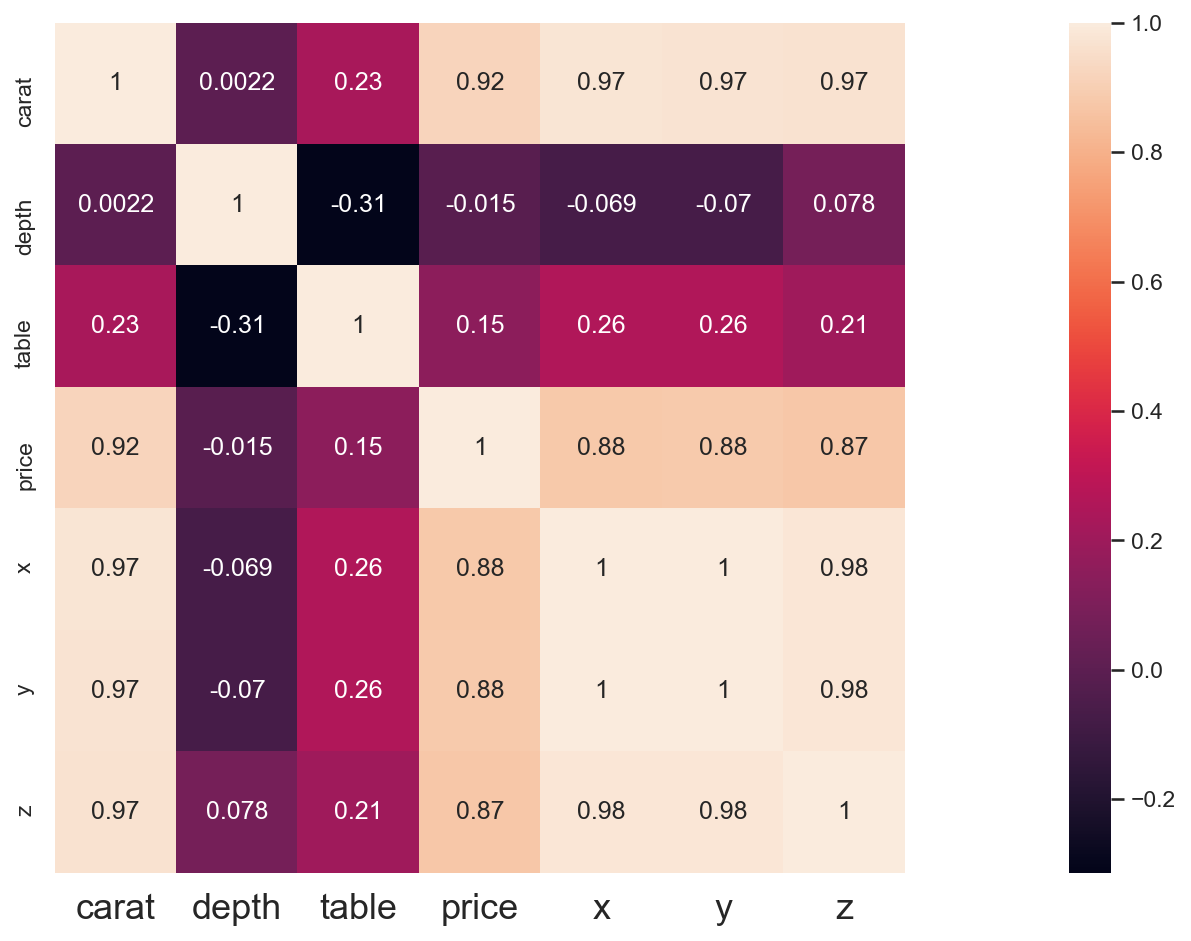

In [380]:
# Correlation Map
corr = under_sample.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [381]:
#Notes
# 'depth' is inversely related to Price.
# 'price'is highly correlated to Carat, and dimensions 'x', 'y', 'z'.
# The 'carat' of a diamond has the most significant factor on 'price'

In [382]:
import sklearn

under_sample = sklearn.utils.shuffle(under_sample) # always shuffle your data to avoid any biases that may emerge b/c of some order.
test_size = 200
numeric_features=['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
X= under_sample[numeric_features]
y= under_sample['cut']

# Check on X,y 
print (X,y)
#Price is disproportionate in number size/scale

       carat  depth  table  price     x     y     z
50793   0.72   63.9   58.0   2305  5.72  5.64  3.63
36994   0.54   62.5   54.0    964  5.22  5.25  3.27
40279   0.32   62.3   54.0    494  4.41  4.43  2.75
19259   1.23   61.5   54.0   7988  6.89  6.92  4.25
41665   0.61   63.7   60.0   1239  5.34  5.28  3.38
...      ...    ...    ...    ...   ...   ...   ...
30859   0.33   62.2   56.0    743  4.47  4.44  2.77
26292   1.52   64.0   55.0  15792  7.27  7.19  4.63
15423   1.01   64.0   58.0   6176  6.30  6.24  4.01
51051   0.71   63.9   57.0   2331  5.57  5.61  3.57
39947   0.24   60.8   64.0    492  3.97  3.99  2.42

[9812 rows x 7 columns] 50793     Good
36994    Ideal
40279    Ideal
19259    Ideal
41665     Good
         ...  
30859    Ideal
26292     Good
15423     Good
51051     Good
39947     Good
Name: cut, Length: 9812, dtype: object


In [383]:
#Feature Encoding
#Label the categorical features with 'numbers' to classify/distinguish.
#as we can't use string data for modeling.
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()

under_sample['cut'] = label_cut.fit_transform(under_sample['cut'])
under_sample['color'] = label_color.fit_transform(under_sample['color'])
under_sample['clarity'] = label_clarity.fit_transform(under_sample['clarity'])

## Scale Your `X` Matrix Using a StandardScaler

In [384]:
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
under_sample = sklearn.utils.shuffle(under_sample)
# always randomize your data to avoid any biases .
test_size = 200
numeric_features=['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
###Scale the features/factors
sc = StandardScaler()
X= under_sample[numeric_features].values
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Check if scaler worked
print (X_train)
print (X_test)

[[-0.74800766 -3.32042101  2.19720807 ... -0.52471369 -0.58615114
  -0.9605784 ]
 [-0.81477972  0.6472038  -0.12318366 ... -0.92530666 -0.89536633
  -0.82564077]
 [ 0.49840427 -0.39048269 -0.50991562 ...  0.72364581  0.66007976
   0.62868697]
 ...
 [ 0.67646312  0.03679999 -0.12318366 ...  0.82612308  0.83811275
   0.83858994]
 [-0.85929443  0.6472038  -0.50991562 ... -0.97188724 -0.93284696
  -0.87061998]
 [-0.56994881 -0.45152307 -0.50991562 ... -0.48744922 -0.45496894
  -0.52577938]]
[[-0.25834583 -0.26840192  1.42374416 ... -0.10548848 -0.05205218
  -0.13595958]
 [ 0.96580874  1.19656724  0.65028025 ...  1.03107763  0.97866511
   1.19842361]
 [-1.05961064 -0.63464421 -0.12318366 ... -1.25137071 -1.24206215
  -1.30541899]
 ...
 [-0.43640467 -0.26840192 -0.50991562 ... -0.28249468 -0.2675658
  -0.31587641]
 [ 0.74323518 -2.58793643  1.42374416 ...  1.07765821  1.02551589
   0.6136939 ]
 [ 0.60969105 -0.26840192  0.65028025 ...  0.7795425   0.80063212
   0.74863152]]


## Why Did We Just Do That?
In the cell below, provide a 2–3 sentence explanation of why scaling our $X$ matrix was necessary here. What could have gone wrong if we didn't?

In [385]:
#Machine learning programs/algorithms don't perform well when the input numerical features/factors 
#have very different scales. The factor 'price' is disproportionate to the other numerical
#factors such as carats, x,y,z 

Scaling for KNN is important because KNN uses the distance between two points. If two features are on different scales, the distances between them on each coordinate might be given falsely disproportionate weights. If we didn't scale, it's possible that KNN would make all of its decisions based on the feature with the widest scale.

## Split Into Testing and Training Groups

Now that we've downsampled/balanced our classes, as well as removed unused factors, we're ready to split into testing and training groups. We're doing this avoid _leaking information into our testing set_. 

- First, we'll perform cross-validation on our _training_ set, finding an optimal value for $k$. 
- After this, we'll take that value of $k$ and use it to fit our model to the _training_ set, creating our tuned model.
- Finally, we will take this same model and use it to _predict_ and _score_ against our _testing_ set.
- Note that our model at this point will have never seen nor trained against the _testing_ set.

In the future, we can (and should!) automate this process using a [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) — a tool used to abstract our modeling process, allowing data to be processed without manual intervention.

In [386]:
R2_Scores = []
numeric_features=['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
X= under_sample[numeric_features]
y= under_sample['cut']
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)
#Use Linear Regression model
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('** Linear Regression **')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


** Linear Regression **
Score : 0.4381
[0.45061836 0.43062173 0.43608618 0.43531897 0.4271868 ]

MSE    : 0.14 
MAE    : 0.32 
RMSE   : 0.37 
R2     : 0.44 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


## K-Nearest Neighbors
You're going to fit a KNN model here, but you first need to tune your model to find the best value of $k$. Loop through values of $k$ you think are appropriate (Hint: Look for "elbows" in your result curves) and select the value that produces the best model with respect to **five-fold cross-validation**.

**Important**: Do not use _any_ code copied and pasted directly from the lecture! Typing things out yourself is 100% essential to the learning process. It's OK to use the exact same strategies as we did in class, but be sure to enter them manually.

In [387]:
#Feature Encoding
#Label the categorical features with 'numbers' to classify/distinguish.
#as we can't use string data for modeling.
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
#Encode string factors/features to numbers again
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()
under_sample['cut'] = label_cut.fit_transform(under_sample['cut'])
under_sample['color'] = label_color.fit_transform(under_sample['color'])
under_sample['clarity'] = label_clarity.fit_transform(under_sample['clarity'])

numeric_features=['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
X= under_sample[numeric_features]
#Switch to diamond_modified for X
diamond_modified=under_sample[numeric_features]
#Scale for X
X= sc.transform(diamond_modified)
y= under_sample['cut']
print(X,y)

from sklearn.decomposition import PCA
from sklearn import cluster, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
inertias = [] 
mapping_inertia = {} 
K = range(1,15) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = cluster.KMeans(n_clusters=k) 
    kmeanModel.fit(under_sample.iloc[:,0:5])     
      
    inertias.append(kmeanModel.inertia_) 

    mapping_inertia[k] = kmeanModel.inertia_ 

[[ 1.32 62.7  56.   ...  7.03  6.97  4.39]
 [ 0.7  64.2  60.   ...  5.58  5.64  3.6 ]
 [ 0.32 61.3  55.   ...  4.4   4.44  2.71]
 ...
 [ 0.51 56.6  59.   ...  5.37  5.26  3.01]
 [ 0.56 61.3  56.   ...  5.28  5.32  3.25]
 [ 1.5  60.3  57.   ...  7.37  7.4   4.45]] 17506    1
51599    0
42628    1
23712    0
677      0
        ..
20098    1
37576    1
46557    0
43335    1
24060    1
Name: cut, Length: 9812, dtype: int64


1 : 89401.18164874651
2 : 67549.29460223217
3 : 52953.7960286227
4 : 41302.909645917316
5 : 35350.128066021214
6 : 32295.70711935821
7 : 29841.34567835673
8 : 27356.27157334633
9 : 25292.393547034346
10 : 23408.382685583256
11 : 21839.667715914613
12 : 20681.600491024976
13 : 19682.18306166619
14 : 18525.31181992012


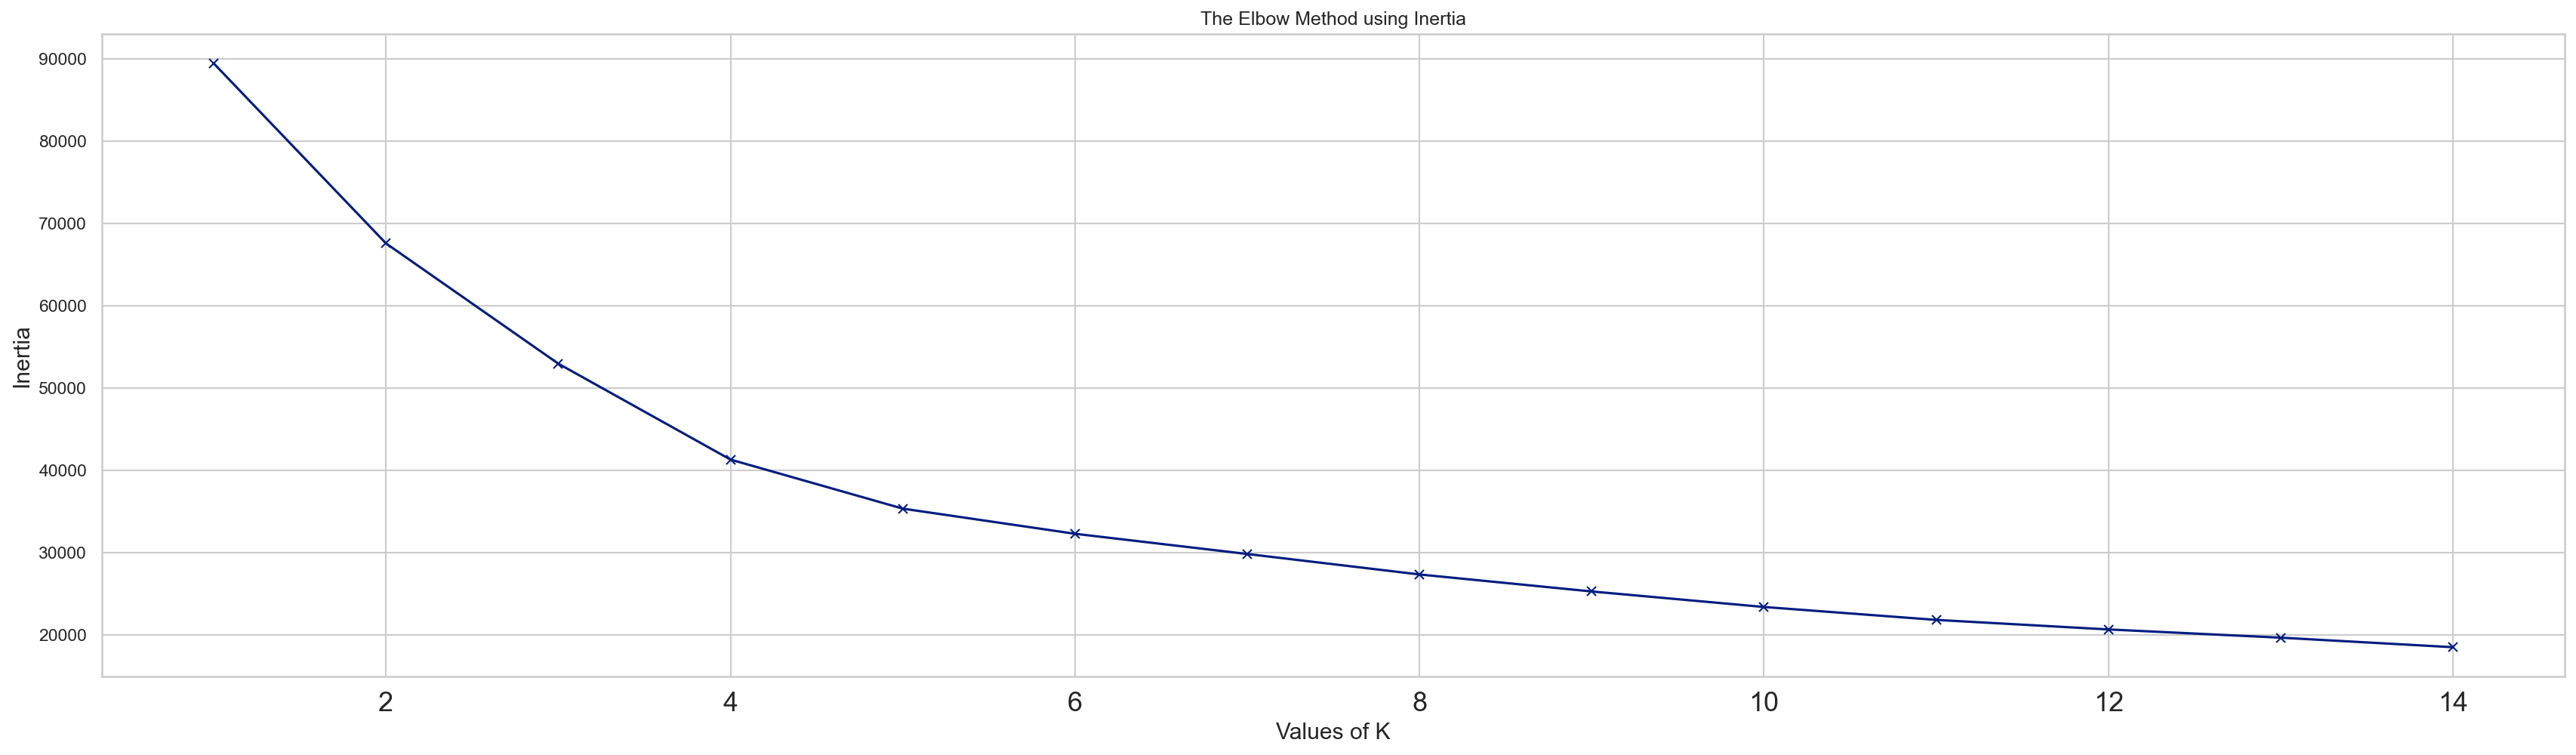

In [388]:
for key,val in mapping_inertia.items(): 
    print(str(key)+' : '+str(val)) 

plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

## Produce the Plot of Tuning Parameter ($k$) vs. Accuracy
What is the "best" value of k?

In [389]:
# k=2 as that point is at the steepest downward slope

## Produce the Best KNN Model
Now that you know the optimal value of $k$, fit a KNN on the training set (this training set should still filtered to `'Ideal'` and `'Good'` cuts).

In [390]:
#Use under_sample
#numeric_features=['carat', 'depth', 'table', 'price', 'x', 'y']
#X= under_sample[numeric_features]
#y= under_sample['cut']
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

X = sc.transform(diamond_modified)
y = under_sample.cut
# Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)
under_sample = pd.DataFrame(scaled_features, columns = under_sample.columns[:-1])
under_sample.describe()


,carat,cut,color,clarity,depth,table,price,x,y
count,9.812000e+03,9.812000e+03,9.812000e+03,9.812000e+03,9.812000e+03,9.812000e+03,9.812000e+03,9.812000e+03,9.812000e+03
mean,2.772955e-16,1.135523e-15,-8.654580e-16,-1.785499e-16,-3.328197e-15,-2.855894e-17,-3.489192e-16,-3.587745e-16,1.385403e-16
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-1.212145e+00,-1.493643e+00,-2.186275e+00,-4.700236e+00,-2.442759e+00,-8.929068e-01,-5.276028e+00,-5.316570e+00,-5.273209e+00
25%,-8.339810e-01,-9.114933e-01,-1.026409e+00,-4.474738e-01,-5.132726e-01,-7.309379e-01,-9.022707e-01,-8.999461e-01,-8.707664e-01
50%,-1.666330e-01,2.528069e-01,1.334579e-01,3.855622e-02,-1.273752e-01,-3.675735e-01,-1.821340e-02,-2.972158e-02,-2.774557e-02
75%,5.229600e-01,8.349570e-01,7.133912e-01,8.283550e-01,5.672400e-01,3.088063e-01,7.076441e-01,7.095014e-01,7.365933e-01
max,4.971947e+00,1.999257e+00,1.873258e+00,3.015490e+00,3.345701e+00,4.025033e+00,3.508710e+00,3.460534e+00,3.404286e+00


## Does This Model Outperform the Baseline?

In [391]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, under_sample["cut"],
                                                   test_size = .3, random_state = 42)

In [392]:
#Import 
from sklearn.neighbors import KNeighborsClassifier

#Instantiate- Use k=5
knn = KNeighborsClassifier(n_neighbors = 2)

#Fit
knn.fit(X_train, y_train)

#predict
pred = knn.predict(X_test)

ValueError: Unknown label type: 'continuous'

In [393]:
#Use KNeighbors Regression
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('** KNeighbours Regression **')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished



** KNeighbours Regression **
Score : 0.9754
[0.97700546 0.97268743 0.97576231 0.97382631 0.97442847]

MSE    : 0.02 
MAE    : 0.08 
RMSE   : 0.16 
R2     : 0.98 


## Prediction
Suppose I have a diamond with the following specifications:

In [150]:
new_diamond = pd.DataFrame({
    'carat': 0.24,
    'depth': 60.,
    'table': 64.,
    'price': 400.,
    'x': 3.,
    'y': 3.,
    'z': 3.
}, index=[0])

What do you predict to be the cut of this diamond?

**Big hint:** Don't forget to scale this new data point appropriately!

In [407]:
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Get data
df = pd.read_csv("data/diamonds.csv")
df = df[df.cut.isin(["Ideal", "Good"])]
X = df.select_dtypes(["int64", "float64"])
y = df.cut
# Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
# Set up kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Set up knn instance 
knn = KNeighborsClassifier()
# Algorithm for fitting the new_diamond specs/data points
gscv = GridSearchCV(knn, {"n_neighbors": range(1, 52)}, cv=kf, n_jobs=-1)
gscv.fit(X_scaled, y)
# Get cross-validation data
cv_df = pd.DataFrame(gscv.cv_results_)

new_diamond = pd.DataFrame({
    'carat': 0.24,
    'depth': 60,
    'table': 64,
    'price': 400,
    'x': 3,
    'y': 3,
    'z': 3
}, index=[0])

# Instantiate the best estimator
knn = gscv.best_estimator_
# Scale the new data in the same way as the training data (X)
new_diamond_scaled = sc.transform(new_diamond)
# Predict the cut of the new diamond
knn.predict(new_diamond_scaled)[0]

'Good'

# Part 3: Now _YOU_ Model!
Put your skills to the test.

Using the _full_ `diamonds` data set, produce a **logistic regression** model that achieves the best five-fold cross-validation. Note that, for this problem, you're performing multi-class classification. The response variable has _five_ categories.

In [318]:
# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 

# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Modeling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

In [319]:
dia = pd.read_csv('data/diamonds.csv')

In [320]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [321]:
#Check for null values
dia.isnull().sum()
dia.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [322]:
#Use diamond size(volume) as factor and so there are fewer factors 
dia['volume'] = dia['x']*dia['y']*dia['z']
dia.drop(['x', 'y', 'z'], axis=1, inplace=True)
dia.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [323]:
#Drop other factors table and depth as there needs to be 5 factors to determine price.
#Table and depth are related to clarity and depth 
#and therefore somwhat overlapping factors/redundant 
dia.drop(['depth'], axis=1, inplace=True)
dia.drop(['table'], axis=1, inplace=True)
dia.head()

,carat,cut,color,clarity,price,volume
0,0.23,Ideal,E,SI2,326,38.202030
1,0.21,Premium,E,SI1,326,34.505856
2,0.23,Good,E,VS1,327,38.076885
3,0.29,Premium,I,VS2,334,46.724580
4,0.31,Good,J,SI2,335,51.917250


In [324]:
#Encode factor/features again.
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()

df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [325]:
# Split the data into train and test.
X = df.drop(['price'], axis=1)
y = df['price']
# Applying Feature Scaling ( StandardScaler ) for X
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
#Modeling to be used RandomForest
# Collect all R2 Scores.
R2_Scores = []
models = ['Logistic Regression']

In [327]:
#Use logarithmic regression
clf_lr = LogisticRegression()
clf_lr.fit(X_train , y_train)
# Create kf instance 
kf = KFold(n_splits=5, shuffle=True, random_state=42)
#Estimator and predict
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv =kf,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('** Logistic Regression **')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)


** Logistic Regression **
Score : 0.8299
[0.84076433 0.82038217 0.82675159 0.83312102 0.81580625]

MSE    : 0.17 
MAE    : 0.17 
RMSE   : 0.41 
R2     : 0.32 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
